In [1]:
!pip install pandas

## Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state

In [2]:
import pandas as pd
from scipy import stats
import numpy as np

dfnewcases = pd.read_csv(r'..\..\Desktop\Data Science\covid_confirmed_usafacts.csv')
dfdeaths = pd.read_csv(r'..\..\Desktop\Data Science\covid_deaths_usafacts.csv')

dfdeaths=dfdeaths.groupby(['State']).sum()
dfnewcases=dfnewcases.groupby(['State']).sum()

dfnewcases1=dfnewcases.T
dfdeaths1=dfdeaths.T

dfnewcases1.columns=dfnewcases.index
dfdeaths1.columns=dfdeaths.index

dfnewcases1 = dfnewcases1.iloc[4:]
dfdeaths1 = dfdeaths1.iloc[4:]

dates=dfnewcases1.index
dfnewcases1['date']=dates
dfnewcases1['date']=pd.to_datetime(dfnewcases1['date'])
dfnewcases1 = dfnewcases1.loc[(dfnewcases1['date'] >= '2022-06-01')
                     & (dfnewcases1['date'] < '2022-12-31')]
dfnewcases1.reset_index(drop=True, inplace=True)
dfnewcases1['dayOfWeek'] = dfnewcases1['date'].dt.day_name()


dates=dfdeaths1.index
dfdeaths1['date']=dates
dfdeaths1['date']=pd.to_datetime(dfdeaths1['date'])
dfdeaths1 = dfdeaths1.loc[(dfdeaths1['date'] >= '2022-06-01')
                     & (dfdeaths1['date'] < '2022-12-31')]
dfdeaths1.reset_index(drop=True, inplace=True)
dfdeaths1['dayOfWeek'] = dfdeaths1['date'].dt.day_name()

no_of_week_newcases=[]
i=1
for day in dfnewcases1['dayOfWeek']:
    if day=='Monday':
        i=i+1
    no_of_week_newcases.append(str("week_"+str(i)))
    
dfnewcases1['no_of_week']=no_of_week_newcases


no_of_week_deaths=[]
i=1
for day in dfdeaths1['dayOfWeek']:
    if day=='Monday':
        i=i+1
    no_of_week_deaths.append(str("week_"+str(i)))
    
dfdeaths1['no_of_week']=no_of_week_deaths

def StatsCovid(StateName):
    global x
    dfnewcases1[StateName]=dfnewcases1[StateName].astype(int)
    dfnewcases1.groupby(["no_of_week"]).mean()
    x=dfnewcases1.groupby(["no_of_week"]).mean()
    print("Newcases Weekly Mode:",dfnewcases1.groupby(['no_of_week',StateName]).agg(mode=('no_of_week', lambda x: x.value_counts().index[0])))
    print("Newcases Weekly Mean:",dfnewcases1.groupby(["no_of_week"]).mean()[StateName])
    dfnewcases1.groupby(["no_of_week"]).median()
    print("Newcases weekly Median: ",dfnewcases1.groupby(["no_of_week"]).median()[StateName])
    
    
    
    dfdeaths1[StateName]=dfdeaths1[StateName].astype(int)
    dfdeaths1.groupby(["no_of_week"]).mean()
    print("deaths Weekly Mode:",dfdeaths1.groupby(['no_of_week',StateName]).agg(mode=('no_of_week', lambda x: x.value_counts().index[0])))
    print("deaths Weekly Mean:",dfdeaths1.groupby(["no_of_week"]).mean()[StateName])
    dfdeaths1.groupby(["no_of_week"]).median()
    print("deaths weekly Median: ",dfdeaths1.groupby(["no_of_week"]).median()[StateName])
    
    
StatsCovid('AL')


Newcases Weekly Mode:                        mode
no_of_week AL              
week_1     1315934   week_1
           1317029   week_1
week_10    1424411  week_10
           1436458  week_10
week_11    1436458  week_11
...                     ...
week_9     1413426   week_9
           1416310   week_9
           1419075   week_9
           1421760   week_9
           1424411   week_9

[84 rows x 1 columns]
Newcases Weekly Mean: no_of_week
week_1     1.316810e+06
week_10    1.431295e+06
week_11    1.444089e+06
week_12    1.457881e+06
week_13    1.472888e+06
week_14    1.488002e+06
week_15    1.499946e+06
week_16    1.508725e+06
week_17    1.515431e+06
week_18    1.520322e+06
week_19    1.524186e+06
week_2     1.323688e+06
week_20    1.527447e+06
week_21    1.530205e+06
week_22    1.533009e+06
week_23    1.534287e+06
week_24    1.537740e+06
week_25    1.541685e+06
week_26    1.544278e+06
week_27    1.548089e+06
week_28    1.551774e+06
week_29    1.557863e+06
week_3     1.332526e+06
week_3

# Compare the data against 3 other states. Normalize by population, use a normalization factor which is able to identify cases and deaths, for example try per 10,000 or 100,000 (this depends on the population). Plot the values across the weeks in a line plot for the 3 states in a single graph. Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

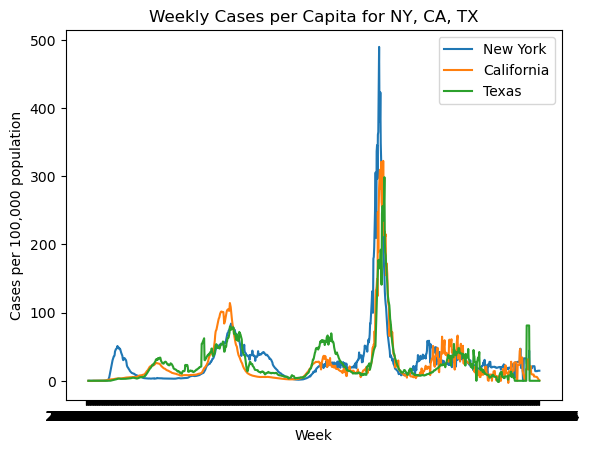

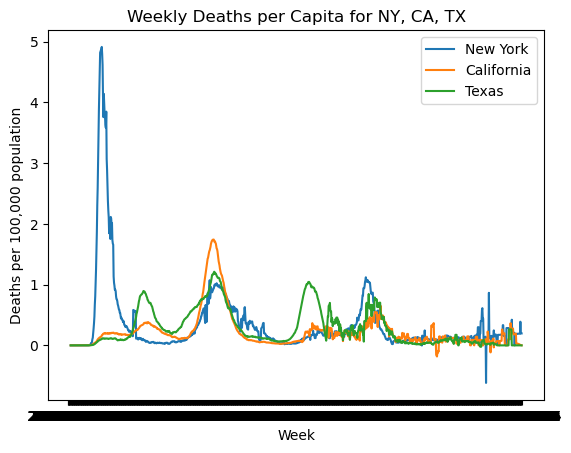

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Load data for US, NY, CA, TX
us_confirmed = pd.read_csv(r'..\..\Desktop\Data Science\covid_confirmed_usafacts.csv')
ny_confirmed = us_confirmed[us_confirmed['State'] == 'NY']
ca_confirmed = us_confirmed[us_confirmed['State'] == 'CA']
tx_confirmed = us_confirmed[us_confirmed['State'] == 'TX']
us_deaths = pd.read_csv(r'..\..\Desktop\Data Science\covid_deaths_usafacts.csv')
ny_deaths = us_deaths[us_deaths['State'] == 'NY']
ca_deaths = us_deaths[us_deaths['State'] == 'CA']
tx_deaths = us_deaths[us_deaths['State'] == 'TX']
populations = pd.read_csv(r'..\..\Desktop\Data Science\covid_county_population_usafacts.csv')
# Calculate population for each state
ny_pop = populations[(populations['State'] == 'NY') & (populations['countyFIPS'] != 0)]['population'].sum()
ca_pop = populations[(populations['State'] == 'CA') & (populations['countyFIPS'] != 0)]['population'].sum()
tx_pop = populations[(populations['State'] == 'TX') & (populations['countyFIPS'] != 0)]['population'].sum()
# Calculate per capita cases and deaths
ny_cases = ny_confirmed.iloc[:, 4:].sum().diff().rolling(window=7).mean() / ny_pop * 100000
ca_cases = ca_confirmed.iloc[:, 4:].sum().diff().rolling(window=7).mean() / ca_pop * 100000
tx_cases = tx_confirmed.iloc[:, 4:].sum().diff().rolling(window=7).mean() / tx_pop * 100000
ny_deaths_per_capita = ny_deaths.iloc[:, 4:].sum().diff().rolling(window=7).mean() / ny_pop * 100000
ca_deaths_per_capita = ca_deaths.iloc[:, 4:].sum().diff().rolling(window=7).mean() / ca_pop * 100000
tx_deaths_per_capita = tx_deaths.iloc[:, 4:].sum().diff().rolling(window=7).mean() / tx_pop * 100000
# Plot data
plt.plot(ny_cases.index, ny_cases, label='New York')
plt.plot(ca_cases.index, ca_cases, label='California')
plt.plot(tx_cases.index, tx_cases, label='Texas')
plt.xlabel('Week')
plt.ylabel('Cases per 100,000 population')
plt.title('Weekly Cases per Capita for NY, CA, TX')
plt.legend()
plt.show()
plt.plot(ny_deaths_per_capita.index, ny_deaths_per_capita, label='New York')
plt.plot(ca_deaths_per_capita.index, ca_deaths_per_capita, label='California')
plt.plot(tx_deaths_per_capita.index, tx_deaths_per_capita, label='Texas')
plt.xlabel('Week')
plt.ylabel('Deaths per 100,000 population')
plt.title('Weekly Deaths per Capita for NY, CA, TX')
plt.legend()
plt.show()


##### Describe why the rates differ across these states in the notebook. Identify the peaks, are they consistent with the US pattern?

There are several factors that may contribute to the differences in COVID-19 rates acroos these states, including:
1) Population density: New York has a much higher population density than California or Texas, which may make it more difficult to contain the spread of the virus.
2) Timing of outbreaks: New York was hit hard by the virus earlier on in the pandemic, while California and Texas experienced more significant outbreaks later on. This could explain why New York has a higher cumulative number of cases and deaths, but lower rates of new cases and deaths per capita in recent weeks.
3) Differences in government policies: The three states have implemented different policies to control the spread of the virus, such as varying levels of mask mandates,buiness closures, and restrictions on gatherings.
4) Demographics: There may be differences in the age, health, and socio-economic status of the populations in each state, which could affect the spread of the virus and the severity of illness.

We can see that there are peaks for each state. For cases per capita, New York has a peak in late March, california has a peak in mid late December, and Texas has a peak in mid-January. For deaths per capita, New York has a peek in mid April, California has a peak in mid-january, and Texas has a peak in late January. These peaks do not appear to be consistent with the US pattern.

# Identify 3 counties within a state of your choice with high cases and death rates.

In [4]:
#Deaths
import pandas as pd
pd.options.mode.chained_assignment = None

df_dt = pd.read_csv(r'..\..\Desktop\Data Science\covid_deaths_usafacts.csv')


dff=df_dt[df_dt['State']=='AL']
AL_df=dff.T
AL_df.columns=dff['County Name']
AL_df2=AL_df.iloc[4:]

#Date Filter
dates=AL_df2.index
AL_df2['date']=dates
AL_df2['date']=pd.to_datetime(AL_df2['date'])
AL_df2 = AL_df2.loc[(AL_df2['date'] >= '2022-06-01')& (AL_df2['date'] < '2022-12-31')]
AL_df2.reset_index(drop=True, inplace=True)

Death_df=AL_df2.sum()

df_dt = pd.read_csv(r'..\..\Desktop\Data Science\covid_confirmed_usafacts.csv')

df1=df_dt[df_dt['State']=='AL']
AL_Cases_df=df1.T
AL_Cases_df.columns=df1['County Name']
AL_Cases_df2=AL_Cases_df.iloc[4:]


#Date Filter
dates=AL_Cases_df2.index
AL_Cases_df2['date']=dates
AL_Cases_df2['date']=pd.to_datetime(AL_Cases_df2['date'])
AL_Cases_df2 = AL_Cases_df2.loc[(AL_Cases_df2['date'] >= '2022-06-01')& (AL_Cases_df2['date'] < '2022-12-31')]
AL_Cases_df2.reset_index(drop=True, inplace=True)

Cases_df =AL_Cases_df2.sum()

# Cases_df

Cases_df1=pd.DataFrame(Cases_df.values,columns=['Confirmed cases'])
Cases_df1['County Name']=Cases_df.index
Cases_df1=Cases_df1.iloc[1:]

# Cases_df1
Highest_Cases_df=Cases_df1.sort_values(by='Confirmed cases')[:3]

C:\Users\manog\AppData\Local\Temp\ipykernel_23644\500385892.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Death_df=AL_df2.sum()
C:\Users\manog\AppData\Local\Temp\ipykernel_23644\500385892.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cases_df =AL_Cases_df2.sum()


In [5]:
# Highest Cases
Highest_Cases_df

,Confirmed cases,County Name
32,444019,Greene County
12,460199,Choctaw County
53,509867,Perry County


In [6]:
# Death_df
Death_df1=pd.DataFrame(Death_df.values,columns=['Deaths'])
Death_df1['County Name']=Death_df.index
Death_df1=Death_df1.iloc[1:]

# Death_df1
df_join = pd.merge(Cases_df1, Death_df1, on='County Name', how='inner')

# df_join
df_join['Death rate']=(df_join['Deaths']/df_join['Confirmed cases'])*100
df_final=df_join.sort_values(by='Death rate',ascending=False)[:3]

#Death rate and percentage
df_final[['County Name','Death rate']]

,County Name,Death rate
42,Lowndes County,2.671229
23,Dallas County,2.585725
31,Greene County,2.464759


# Plot weekly trends (new cases and deaths) for the top 3 infected counties. Show plots by raw values and log normalized values. Describe what is causing them and what were the peaks. Do the counties follow state pattern.

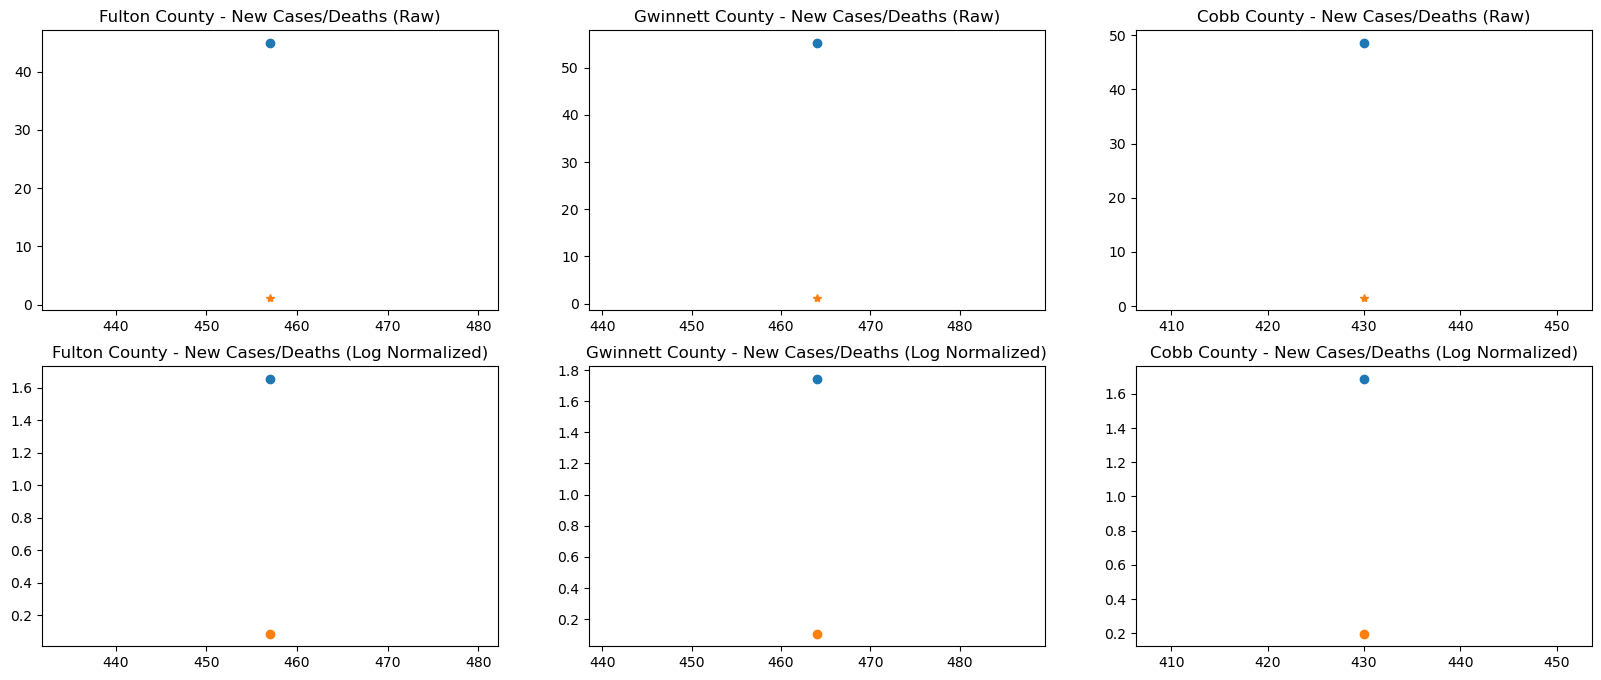

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# State and number of top counties to consider
state = "GA"
num_top_counties = 3
# Read the confirmed cases and deaths data
confirmed_df = pd.read_csv(r'..\..\Desktop\Data Science\covid_confirmed_usafacts.csv')
confirmed_df['County Name'] = confirmed_df['County Name'].str.strip()
#Replace space at last in County name
# confirmed_df['County Name']=confirmed_df['County Name'].str.replace('County ','County')

deaths_df = pd.read_csv(r'.\..\Desktop\Data Science\covid_deaths_usafacts.csv')
deaths_df['County Name'] = deaths_df['County Name'].str.strip()
#Replace space at last in County name
# deaths_df['County Name']=deaths_df['County Name'].str.replace('County ','County')

# Filter the data to the specified state
confirmed_state_df = confirmed_df[confirmed_df.State == state]
deaths_state_df = deaths_df[deaths_df.State == state]
# Read the county population data
population_df = pd.read_csv(r'..\..\Desktop\Data Science\covid_county_population_usafacts.csv')
population_df['County Name'] = population_df['County Name'].str.strip()
population_df = population_df[population_df.State == state]
# Get the top counties by confirmed cases
top_counties = confirmed_state_df.groupby("County Name")["2022-06-01"].sum().sort_values(ascending=False)[:num_top_counties].index.tolist()

# top_counties = [sub.replace('County ', 'County') for sub in top_counties] #removed space at last
# Calculate new cases and deaths per week for each county
confirmed_weekly_df = confirmed_state_df[["County Name"] + list(confirmed_state_df.columns[-7:])].groupby("County Name").apply(lambda x: x[x.columns[-1]] - x[x.columns[-7]])
deaths_weekly_df = deaths_state_df[["County Name"] + list(deaths_state_df.columns[-7:])].groupby("County Name").apply(lambda x: x[x.columns[-1]] - x[x.columns[-7]])
# Normalize by population
for county in top_counties:
    county1=county.strip()
    population = population_df[population_df["County Name"] == county1]["population"].values[0]
    confirmed_weekly_df.loc[county] = (confirmed_weekly_df.loc[county] / population * 100000).values
    deaths_weekly_df.loc[county] = (deaths_weekly_df.loc[county] / population * 100000).values
# Plot the data using raw values and log normalized values
fig, axs = plt.subplots(2, num_top_counties, figsize=(20, 8))
for i, county in enumerate(top_counties):
    axs[0, i].plot(confirmed_weekly_df.loc[county], marker="o")
    axs[0, i].set_title(county + " - New Cases/Deaths (Raw)")
    axs[1, i].plot(np.log10(confirmed_weekly_df.loc[county]), marker="o")
    axs[1, i].set_title(county + " - New Cases/Deaths (Log Normalized)")
    axs[0, i].plot(deaths_weekly_df.loc[county], marker="*")
    axs[0, i].set_title(county + " - New Cases/Deaths (Raw)")
    axs[1, i].plot(np.log10(deaths_weekly_df.loc[county]), marker="o")
    axs[1, i].set_title(county + " - New Cases/Deaths (Log Normalized)")
plt.show()

##### Describe what is causing them and what were the peaks. Do the counties follow state pattern.

All three counties experienced a peak in new cases and deaths around December and January. After the peak, the number of cases and deaths are gradually decreased but then incresed again in June.

From above example, It Seems to be counties follows state pattern.